# CSC420 Assignment 3 Question 4

In [1]:
import matplotlib.pyplot as plt
import scipy
import cv2
import numpy as np
import math
from scipy.special import softmax

In [2]:
def get_image(path, coloring=cv2.IMREAD_GRAYSCALE):
    raw_image = cv2.imread(path, coloring)
    # croped_image = np.asarray(cv2.resize(raw_image, (900, 1200), interpolation = cv2.INTER_AREA))
    # plt.imshow(raw_image, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    # plt.show()
    return raw_image

In [3]:
def get_gradient(image):
    sobelx = np.array(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3))
    sobely = np.array(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3))
    gradient = np.array([sobelx, sobely])
    gradient = gradient.transpose(1, 2, 0)
    gradient_magnitude = np.sqrt(sobelx * sobelx + sobely * sobely)
    # plt.imshow(gradient_magnitude, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    # plt.show()
    return sobelx, sobely, gradient, gradient_magnitude

In [4]:
def get_eigenvalues(det, trace):
    diff = np.sqrt(np.abs(trace * trace - 4 * det))
    lambda_1 = (trace - diff) / 2
    lambda_2 = (trace + diff) / 2
    eigenvalues = np.array([lambda_1, lambda_2]).transpose(1, 2, 0)
    return lambda_1, lambda_2, eigenvalues

In [5]:
I1 = get_image('Q4/University_College,_University_of_Toronto.jpg')

In [6]:
# blur1 = cv2.GaussianBlur(I1,(5,5),7)
Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(I1)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbcb0988550>)

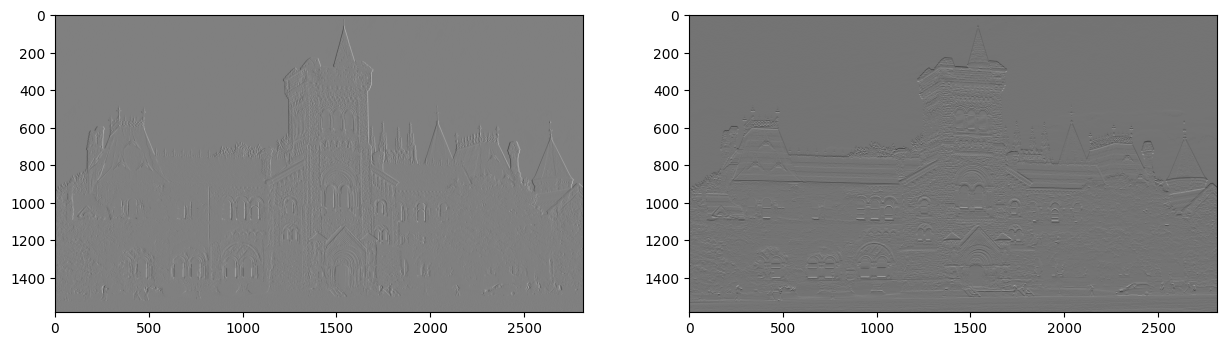

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(Ix, cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(Iy, cmap = 'gray')

In [8]:
Ix.min(), Ix.max(), Iy.min(), Iy.max()

(-804.0, 802.0, -653.0, 788.0)

In [9]:
IxIy = np.multiply(Ix, Iy)
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)
Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbc810a6d60>)

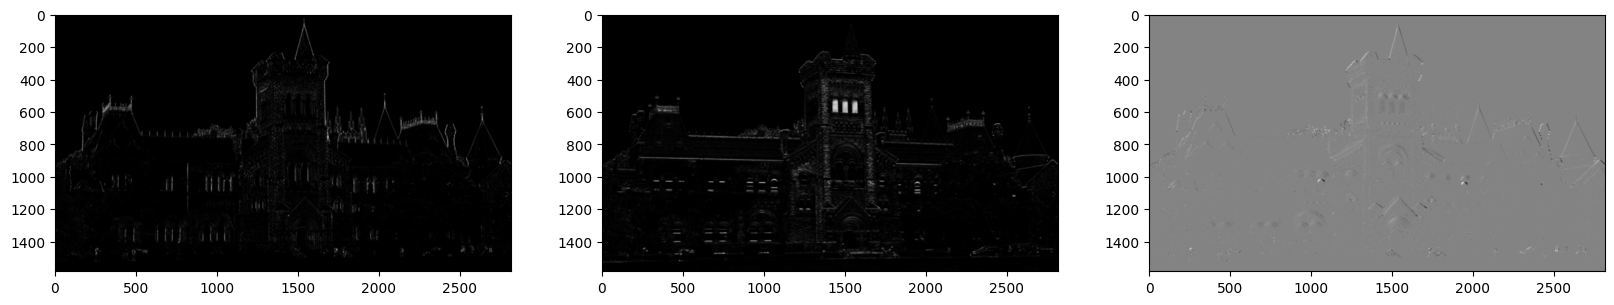

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1), plt.imshow(Ix2_blur,cmap = 'gray')
plt.subplot(1,3,2), plt.imshow(Iy2_blur,cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(IxIy_blur,cmap = 'gray')

In [11]:
# (\lamda_1 + \lambda_2) and (\lamda_1 * \lambda_2) for the M matrix
det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
trace = Ix2_blur + Iy2_blur

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fbca14bd070>)

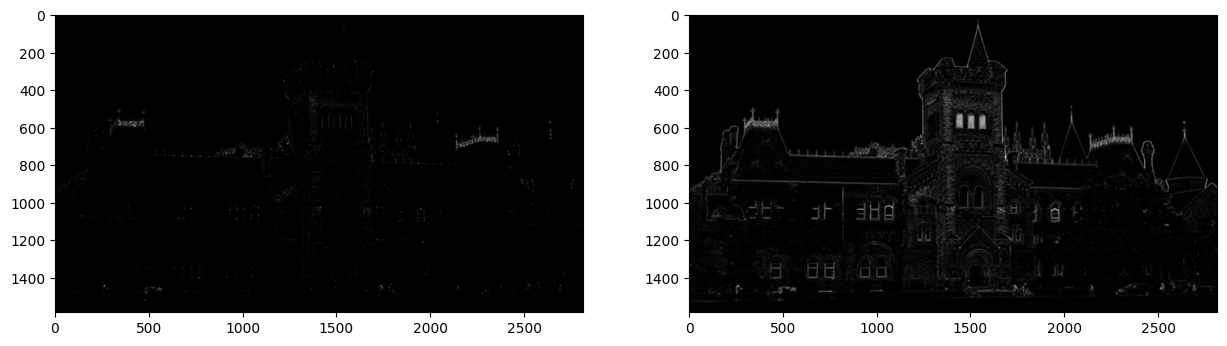

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(det,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(trace,cmap = 'gray')

In [13]:
lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)
print(eigenvalues.shape)
print(lambda_1.shape)
print(lambda_2.shape)

(1584, 2816, 2)
(1584, 2816)
(1584, 2816)


In [14]:
def do_all_the_things(path, i=1):
    image = get_image(path)
    # blur = cv2.GaussianBlur(I1,(5,5),7)
    Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(image)
    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)
    Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
    Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
    IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)
    det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
    trace = Ix2_blur + Iy2_blur
    lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)
    plt.scatter(lambda_2.flatten(), lambda_1.flatten())
    plt.title('Scatter plot of the eigenvalues of SMM of I' + str(i))
    plt.xlabel('Lambda_1')
    plt.ylabel('Lambda_2')
    plt.savefig('I' + str(i) +'_scatter.png')
    plt.show()
    count, bins_count = np.histogram(lambda_1, bins=10)

    # finding the PDF of the histogram using count values
    pdf = count / sum(count)

    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)

    # plotting PDF and CDF
    # plt.plot(bins_count[1:], cdf, color="red", label="PDF")
    # plt.show()

    count, bins_count = np.histogram(lambda_2, bins=10)

    # finding the PDF of the histogram using count values
    pdf = count / sum(count)

    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf_2 = np.cumsum(pdf)

    # plotting PDF and CDF
    plt.plot(bins_count[1:], cdf, color="red", label="lambda_1")
    plt.plot(bins_count[1:], cdf_2, color="blue", label="lambda_2")
    plt.legend()
    plt.show()

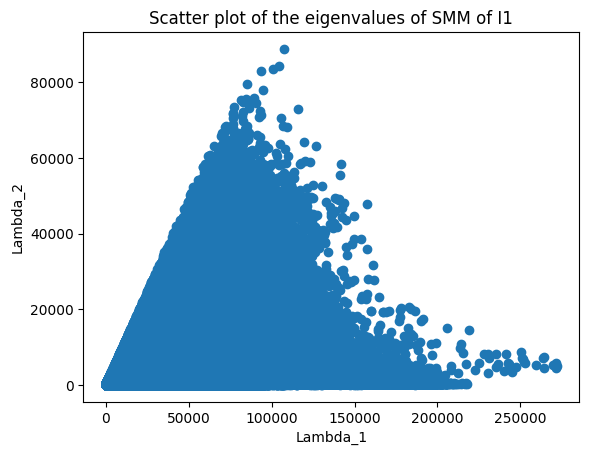

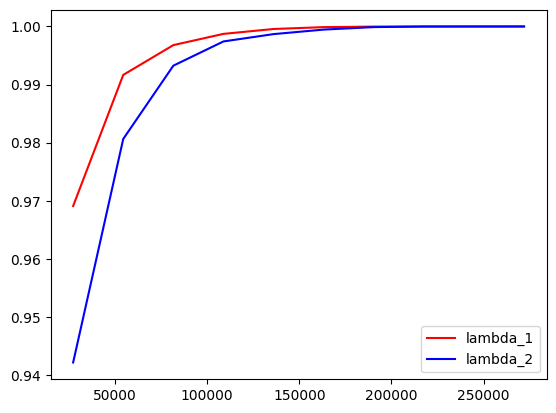

In [15]:
do_all_the_things('Q4/University_College,_University_of_Toronto.jpg')

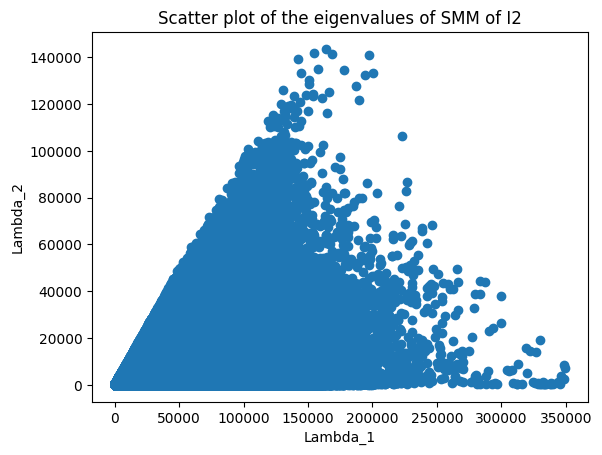

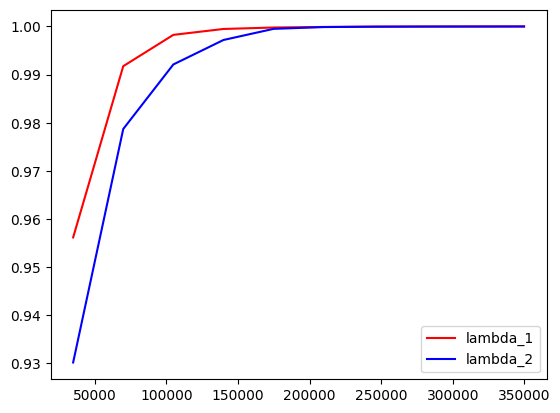

In [16]:
do_all_the_things('Q4/University_College_Lawn,_University_of_Toronto,_Canada.jpg', i=2)

In [20]:
from matplotlib import image as mpimg


def get_corners(path, i=1):
    image = get_image(path)
    # blur = cv2.GaussianBlur(I1,(5,5),7)
    Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(image)
    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)
    Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10)
    Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10)
    IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10)
    # (\lamda_1 + \lambda_2) and (\lamda_1 * \lambda_2) for the M matrix
    det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
    trace = Ix2_blur + Iy2_blur
    lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)

    print(lambda_1.max())
    print(lambda_2.max())

    corner_threshold_x = np.percentile(lambda_1, 97.3)
    corner_threshold_y = np.percentile(lambda_2, 97.3)
    # corner_threshold_y = 0.2 * lambda_2.max()

    print(corner_threshold_x.max())
    print(corner_threshold_y.max())

    lambda_1_flags = np.where(lambda_1.flatten() > corner_threshold_x)
    lambda_2_flags = np.where(lambda_2.flatten() > corner_threshold_y)

    flags = np.intersect1d(lambda_1_flags, lambda_2_flags)

    x = flags / image.shape[1]
    y = flags % image.shape[1]


    plt.imshow(mpimg.imread(path))
    plt.scatter(y, x, s=0.1, color='red')
    plt.savefig('I' + str(i) + '_corner.png')
    plt.show()

88883.123236017
271991.0140063198
9652.09400733719
45066.099801198274


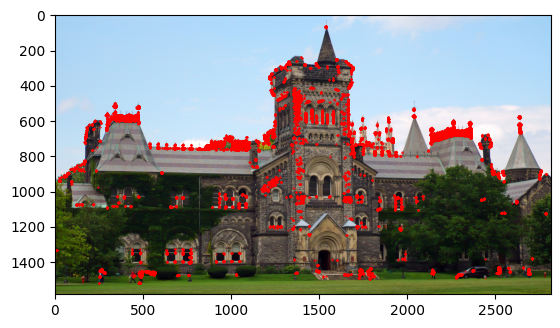

In [21]:
get_corners('Q4/University_College,_University_of_Toronto.jpg')

143613.53106516923
349723.7304754149
18496.527638092903
62614.936168467226


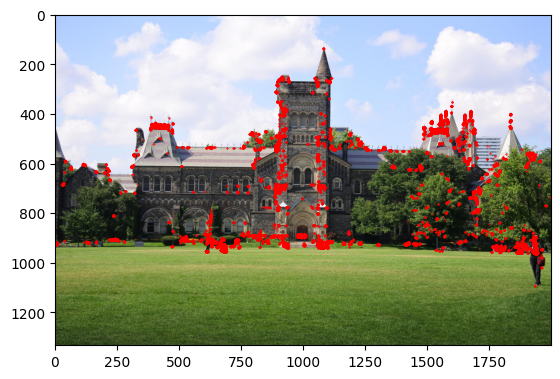

In [22]:
get_corners('Q4/University_College_Lawn,_University_of_Toronto,_Canada.jpg', i=2)

In [35]:
from matplotlib import image as mpimg


def get_corners_blur(path, i=1):
    image = get_image(path)
    blur = cv2.GaussianBlur(image,(5,5),40)
    Ix, Iy, gradient_1, gradient_magnitude_1 = get_gradient(blur)
    IxIy = np.multiply(Ix, Iy)
    Ix2 = np.multiply(Ix, Ix)
    Iy2 = np.multiply(Iy, Iy)
    Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),100)
    Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),100)
    IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),100)
    det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
    trace = Ix2_blur + Iy2_blur
    lambda_1, lambda_2, eigenvalues = get_eigenvalues(det, trace)

    print(lambda_1.max())
    print(lambda_2.max())

    corner_threshold_x = np.percentile(lambda_1, 97.3)
    corner_threshold_y = np.percentile(lambda_2, 97.3)

    print(corner_threshold_x.max())
    print(corner_threshold_y.max())

    lambda_1_flags = np.where(lambda_1.flatten() > corner_threshold_x)
    lambda_2_flags = np.where(lambda_2.flatten() > corner_threshold_y)

    flags = np.intersect1d(lambda_1_flags, lambda_2_flags)

    x = flags / image.shape[1]
    y = flags % image.shape[1]


    plt.imshow(mpimg.imread(path))
    plt.scatter(y, x, s=0.1, color='red')
    plt.savefig('I' + str(i) + '_corner_blurred.png')
    plt.show()

27815.887479582834
65829.27464088597
1630.5616507823459
11882.072853005448


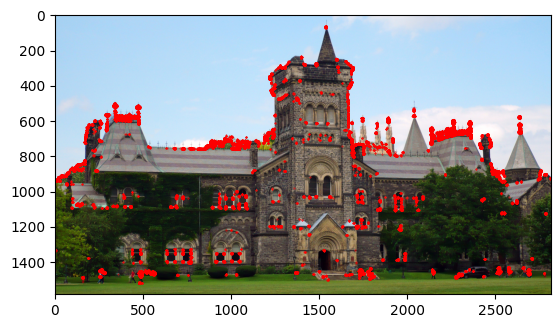

In [36]:
get_corners_blur('Q4/University_College,_University_of_Toronto.jpg')

37337.56352195077
69459.57039569502
1876.0193939699147
12141.964873357754


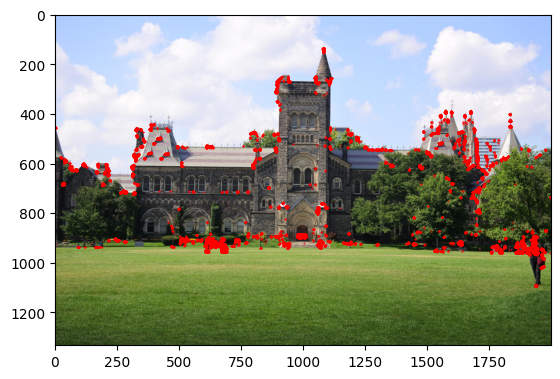

In [37]:
get_corners_blur('Q4/University_College_Lawn,_University_of_Toronto,_Canada.jpg', i=2)